First look for new data..

In [2]:
import os, time
from datetime import datetime

data_dir = '/Volumes/JUPITER/DATA'

# look for new *.bin
cutoff1 = (datetime(2014,3,1,0,0) - datetime(1970,1,1)).total_seconds()
cutoff2 = (datetime(2015,1,1,0,0) - datetime(1970,1,1)).total_seconds()
newdata = []
for dirpath, subdirs, files in os.walk(data_dir):
    for f in files:
        if f.endswith('.png'):
            t = os.path.getctime(os.path.join(dirpath, f))
            if (t>cutoff1) and (t<cutoff2):
                newdata.append(os.path.join(dirpath, f))
newdata.sort(key=lambda n: os.path.getctime(n))

for n in newdata:
    print n, time.ctime(os.path.getctime(n))

In [3]:
%matplotlib inline
import matplotlib as mpl
mpl.style.use('/Users/nik/Dropbox/Notebooks/thesisrc.py')
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import pandas as pd
import lvdatatools as lvdt

In [4]:
def split_sweeps(df, col_name):
    eps = 1e-6
    ind = np.where(abs(np.diff(df[col_name]))<eps)[0]
    return np.concatenate(([0],ind,[len(df[col_name])]), axis=0)

# Metallic Samples

In [47]:
#devices to look at: scf68, scfmh5

fl = ['/Volumes/JUPITER/Data/SCF68/room_temp/q3_1-2_gateswp_postwb_a.bin', 
     '/Volumes/JUPITER/Data/scfmh5/gateswp_14-12-6_300K-0T_a.bin']

(2, 6)

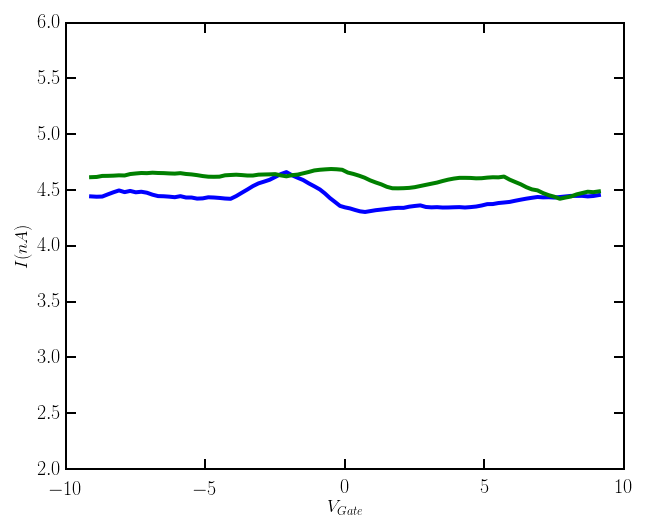

In [120]:
f = fl[0]
df = lvdt.get_data_2d(f)
dfup = pd.concat([df.iloc[150:,:],df.iloc[0:51,:]])
dfup = pd.rolling_mean(dfup, 10)
dfdown = df.iloc[50:151,:]
dfdown = pd.rolling_mean(dfdown, 10)

fig, ax = plt.subplots()
ax.plot(dfup['Gate'], dfup['Iavg']*1e9)
ax.plot(dfdown['Gate'], dfdown['Iavg']*1e9)
ax.set_ylabel(r'$I (nA)$')
ax.set_xlabel(r'$V_{Gate}$')
ax.set_ylim(2,6)

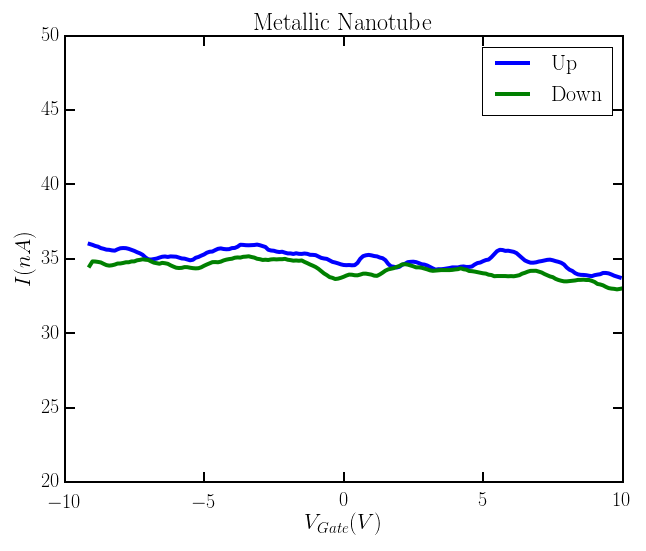

In [126]:
#WINNER!

f = '/Volumes/JUPITER/Data/scfmh5/gateswp_14-12-6_300K-0T_a.bin'
df = lvdt.get_data_2d(f)
ind = split_sweeps(df,'Gate')

up = []
down = []
for i in range(len(ind)-1):
    if i%2==0:
        up.append(df.iloc[ind[i]:ind[i+1],:])
    else:
        down.append(df.iloc[ind[i]:ind[i+1],:])
dfup = pd.concat(up)
dfup = dfup.groupby(dfup['Gate']).mean()
dfup = pd.rolling_mean(dfup, 10)
dfdown = pd.concat(down)
dfdown = dfdown.groupby(dfdown['Gate']).mean()
dfdown = pd.rolling_mean(dfdown, 10)

fig, ax = plt.subplots()
#ax.plot(df['Gate'],df['Iavg'])
ax.plot(dfup.index, dfup['Iavg']*1e9, label = 'Up')
ax.plot(dfdown.index, dfdown['Iavg']*1e9, label = 'Down')
ax.set_ylabel(r'$I (nA)$', fontsize = 22)
ax.set_xlabel(r'$V_{Gate}(V)$', fontsize = 22)
ax.set_ylim(20,50)
ax.set_title('Metallic Nanotube', fontsize = 24)
ax.legend(fontsize = 22)

# Semiconducting Samples

In [ ]:
#SCF72, scfmn4, scfmq3_q2, scfmm6_q4, scfmj7_q1

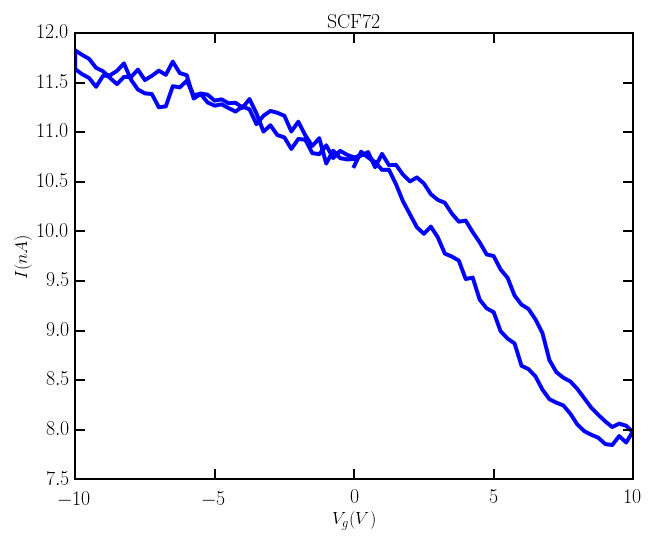

In [129]:
f = '/Volumes/JUPITER/Data/SCF72/room_temp/gate-swp_15-23_13_a.bin'
data = np.fromfile(f, '>d')
data = data.reshape((-1, data[0]))
gate = data[:,1]
current = data [:,2]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(gate, current*1e9)
ax.set_title('SCF72')
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$I (nA)$')

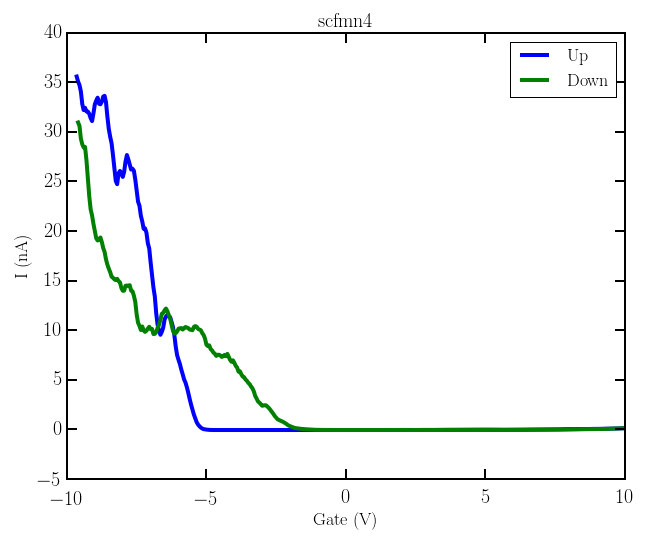

In [137]:
f = '/Volumes/JUPITER/Data/scfmn4/room_temp/gateswp_2-10_5_a.bin'
df = lvdt.get_data_2d(f)
gf = df.iloc[0:803,:]

dfup = pd.concat([gf.iloc[601:,:],gf.iloc[0:200,:]])
dfup = dfup.groupby(dfup['T']).mean()
dfup = pd.rolling_mean(dfup, 8)
dfdown = gf.iloc[200:601]
dfdown = dfdown.groupby(dfdown['T']).mean()
dfdown = pd.rolling_mean(dfdown, 8)

fig, ax = plt.subplots()
ax.plot(dfup.index, dfup['Iavg']*1e9, label='Up')
ax.plot(dfdown.index, dfdown['Iavg']*1e9, label='Down')
ax.set_xlabel('Gate (V)')
ax.set_ylabel('I (nA)')
ax.set_title('scfmn4')
ax.legend()

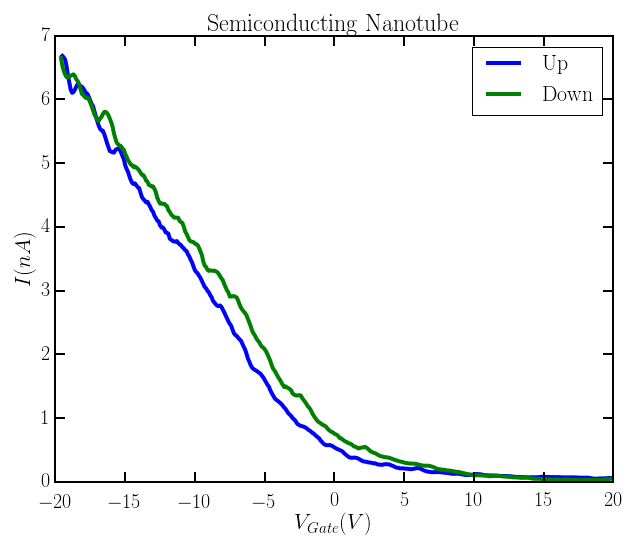

In [174]:
#WINNER

f = '/Volumes/JUPITER/Data/scfmm6_q4/room_temp/gateswp_19-11_1_c.bin'
df = lvdt.get_data_2d(f)
ind = split_sweeps(df, 'Gate')
df['up'] = (df['Gate']-df['Gate'].shift()).fillna(0)>0

dfup = df[df['up']==True]
dfup = dfup.groupby(dfup['Gate']).mean()
dfup = pd.rolling_mean(dfup, 5)
dfdown = df[df['up']==False]
dfdown = dfdown.groupby(dfdown['Gate']).mean()
dfdown = pd.rolling_mean(dfdown, 5)

fig, ax = plt.subplots()
ax.plot(dfup.index, dfup['Iavg']*1e9, label='Up')
ax.plot(dfdown.index, dfdown['Iavg']*1e9, label='Down')
ax.set_ylabel(r'$I (nA)$', fontsize = 22)
ax.set_xlabel(r'$V_{Gate}(V)$', fontsize = 22)
ax.set_ylim(0,7)
ax.set_title('Semiconducting Nanotube', fontsize = 24)
ax.legend(fontsize = 22)

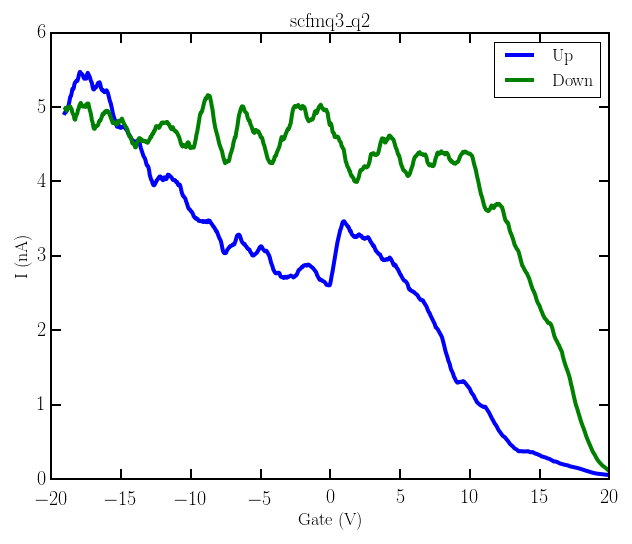

In [173]:
f = '/Volumes/JUPITER/Data/scfmq3_q2/room_temp/gateswp_6-16_17_b.bin'

df = lvdt.get_data_2d(f)

dfup = pd.concat([df.iloc[1201:,:],df.iloc[0:400,:]])
dfup = dfup.groupby(dfup['Gate']).mean()
dfup = pd.rolling_mean(dfup, 20)
dfdown = df.iloc[400:1201]
dfdown = dfdown.groupby(dfdown['Gate']).mean()
dfdown = pd.rolling_mean(dfdown, 20)

fig, ax = plt.subplots()
ax.plot(dfup.index, dfup['Iavg']*1e9, label='Up')
ax.plot(dfdown.index, dfdown['Iavg']*1e9, label='Down')
ax.set_xlabel('Gate (V)')
ax.set_ylabel('I (nA)')
ax.set_title('scfmq3\_q2')
ax.legend()

# Small Bandgap Semiconducting Samples

In [175]:
#scfmc3, scfmi4, scfmf8_q3, scfmj7_q1, scfmf5_q4

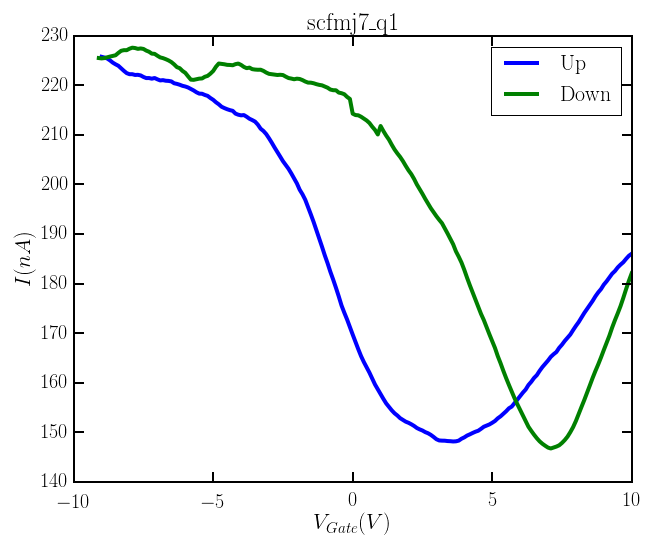

In [179]:
f = '/Volumes/JUPITER/Data/scfmj7_q1/room_temp/gateswp_11-12-6_b.bin'
df = lvdt.get_data_2d(f)
df['up'] = (df['Gate']-df['Gate'].shift()).fillna(0)>0

dfup = df[df['up']==True]
dfup = dfup.groupby(dfup['Gate']).mean()
dfup = pd.rolling_mean(dfup, 10)
dfdown = df[df['up']==False]
dfdown = dfdown.groupby(dfdown['Gate']).mean()
dfdown = pd.rolling_mean(dfdown, 10)

fig, ax = plt.subplots()
ax.plot(dfup.index, dfup['Iavg']*1e9, label='Up')
ax.plot(dfdown.index, dfdown['Iavg']*1e9, label='Down')
ax.set_ylabel(r'$I (nA)$', fontsize = 22)
ax.set_xlabel(r'$V_{Gate}(V)$', fontsize = 22)
#ax.set_ylim(0,7)
ax.set_title('scfmj7\_q1', fontsize = 24)
ax.legend(fontsize = 22)

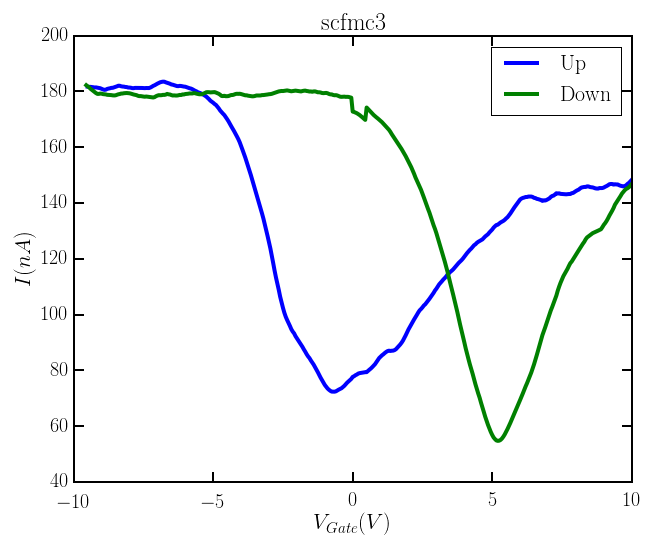

In [5]:
f = '/Volumes/JUPITER/Data/scfmc3/room_temp/gateswp_4-5_20_c.bin'
df = lvdt.get_data_2d(f)
df['up'] = (df['Gate']-df['Gate'].shift()).fillna(0)>0

dfup = df[df['up']==True]
dfup = dfup.groupby(dfup['Gate']).mean()
dfup = pd.rolling_mean(dfup, 10)
dfdown = df[df['up']==False]
dfdown = dfdown.groupby(dfdown['Gate']).mean()
dfdown = pd.rolling_mean(dfdown, 10)

fig, ax = plt.subplots()
ax.plot(dfup.index, dfup['Iavg']*1e9, label='Up')
ax.plot(dfdown.index, dfdown['Iavg']*1e9, label='Down')
ax.set_ylabel(r'$I (nA)$', fontsize = 22)
ax.set_xlabel(r'$V_{Gate}(V)$', fontsize = 22)
#ax.set_ylim(0,7)
ax.set_title('scfmc3', fontsize = 24)
ax.legend(fontsize = 22)

fig.savefig('/Users/nik/Dropbox/Repos/thesis/figures/chapter4/gate_hyst.png', dpi=300)

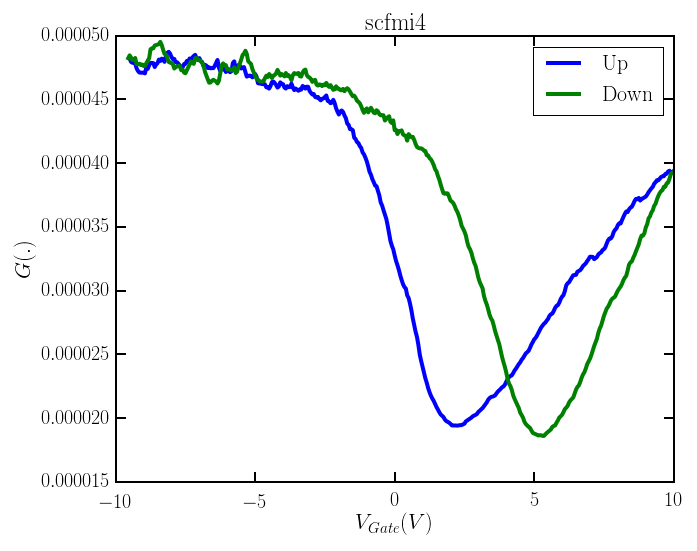

In [186]:
#WINNER!

f = '/Volumes/JUPITER/Data/scfmi4/gateswp_4-20-6_300K_e.bin'
df = lvdt.get_data_2d(f)
df['up'] = (df['Gate']-df['Gate'].shift()).fillna(0)>0

dfup = df[df['up']==True]
dfup = dfup.groupby(dfup['Gate']).mean()
dfup = pd.rolling_mean(dfup, 10)
dfdown = df[df['up']==False]
dfdown = dfdown.groupby(dfdown['Gate']).mean()
dfdown = pd.rolling_mean(dfdown, 10)

fig, ax = plt.subplots()
ax.plot(dfup.index, dfup['Gavg'], label='Up')
ax.plot(dfdown.index, dfdown['Gavg'], label='Down')
ax.set_ylabel(r'$G (.)$', fontsize = 22)
ax.set_xlabel(r'$V_{Gate}(V)$', fontsize = 22)
#ax.set_ylim(0,7)
ax.set_title('scfmi4', fontsize = 24)
ax.legend(fontsize = 22)

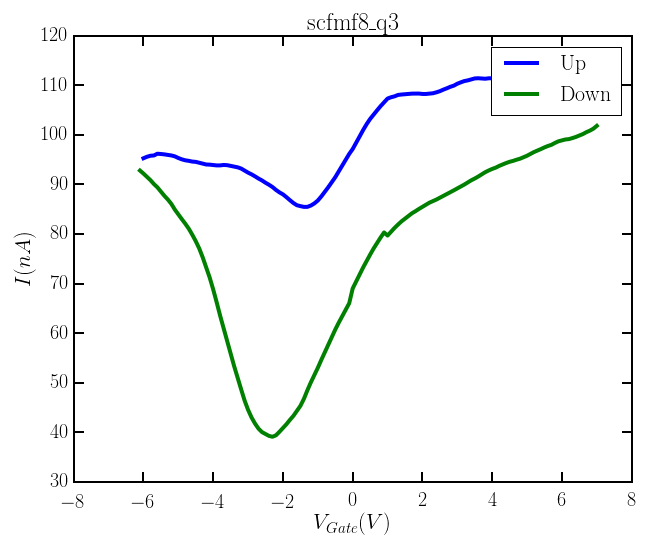

In [193]:
f = '/Volumes/JUPITER/Data/scfmf8_q3/room_temp/topgateswp_14-11_1-15_f.bin'
df = lvdt.get_data_2d(f)
df['up'] = (df['Gate']-df['Gate'].shift()).fillna(0)>0

dfup = df[df['up']==True]
dfup = dfup.groupby(dfup['Gate']).mean()
dfup = pd.rolling_mean(dfup, 10)
dfdown = df[df['up']==False]
dfdown = dfdown.groupby(dfdown['Gate']).mean()
dfdown = pd.rolling_mean(dfdown, 10)

fig, ax = plt.subplots()
ax.plot(dfup.index, dfup['Iavg']*1e9, label='Up')
ax.plot(dfdown.index, dfdown['Iavg']*1e9, label='Down')
ax.set_ylabel(r'$I (nA)$', fontsize = 22)
ax.set_xlabel(r'$V_{Gate}(V)$', fontsize = 22)
#ax.set_ylim(0,7)
ax.set_title('scfmf8\_q3', fontsize = 24)
ax.legend(fontsize = 22)

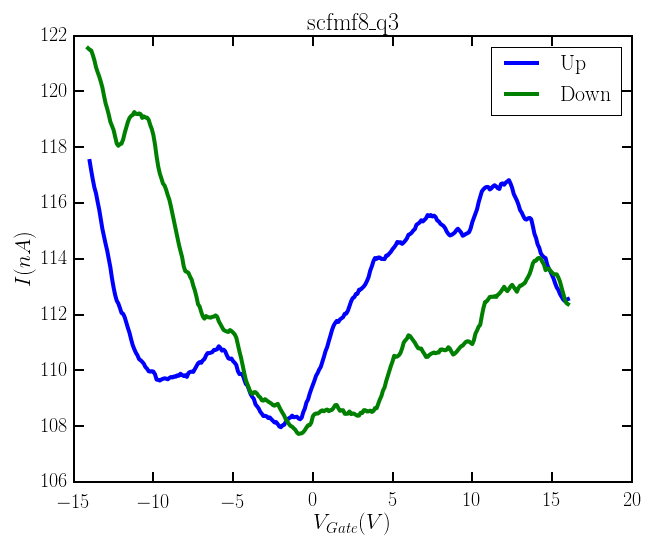

In [195]:
f = '/Volumes/JUPITER/Data/scfmf8_q3/room_temp/gateswp_14-11_1-15_h.bin'
df = lvdt.get_data_2d(f)
df['up'] = (df['Gate']-df['Gate'].shift()).fillna(0)>0

dfup = df[df['up']==True]
dfup = dfup.groupby(dfup['Gate']).mean()
dfup = pd.rolling_mean(dfup, 20)
dfdown = df[df['up']==False]
dfdown = dfdown.groupby(dfdown['Gate']).mean()
dfdown = pd.rolling_mean(dfdown, 20)

fig, ax = plt.subplots()
ax.plot(dfup.index, dfup['Iavg']*1e9, label='Up')
ax.plot(dfdown.index, dfdown['Iavg']*1e9, label='Down')
ax.set_ylabel(r'$I (nA)$', fontsize = 22)
ax.set_xlabel(r'$V_{Gate}(V)$', fontsize = 22)
#ax.set_ylim(0,7)
ax.set_title('scfmf8\_q3', fontsize = 24)
ax.legend(fontsize = 22)

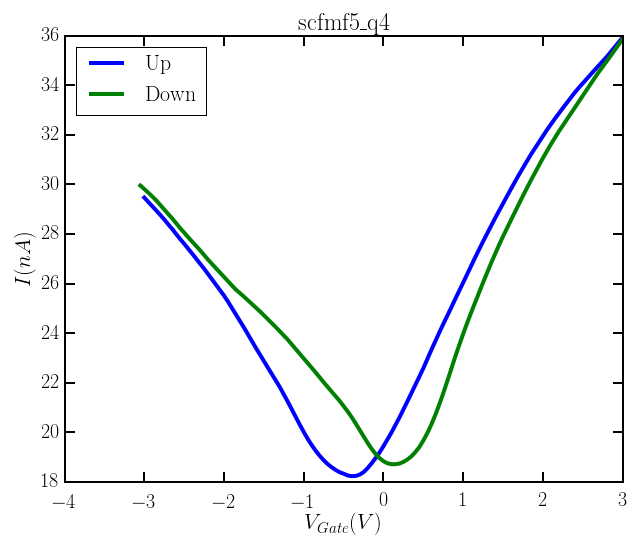

In [198]:
f = '/Volumes/JUPITER/Data/scfmf5_q4/room_temp/topgateswp_19-20_1-10_c.bin'
df = lvdt.get_data_2d(f)
df['up'] = (df['Gate']-df['Gate'].shift()).fillna(0)>0

dfup = df[df['up']==True]
dfup = dfup.groupby(dfup['Gate']).mean()
dfup = pd.rolling_mean(dfup, 20)
dfdown = df[df['up']==False]
dfdown = dfdown.groupby(dfdown['Gate']).mean()
dfdown = pd.rolling_mean(dfdown, 20)

fig, ax = plt.subplots()
ax.plot(dfup.index, dfup['Iavg']*1e9, label='Up')
ax.plot(dfdown.index, dfdown['Iavg']*1e9, label='Down')
ax.set_ylabel(r'$I (nA)$', fontsize = 22)
ax.set_xlabel(r'$V_{Gate}(V)$', fontsize = 22)
#ax.set_ylim(0,7)
ax.set_title('scfmf5\_q4', fontsize = 24)
ax.legend(loc = 'upper left', fontsize = 22)

## Assemble the whole plot

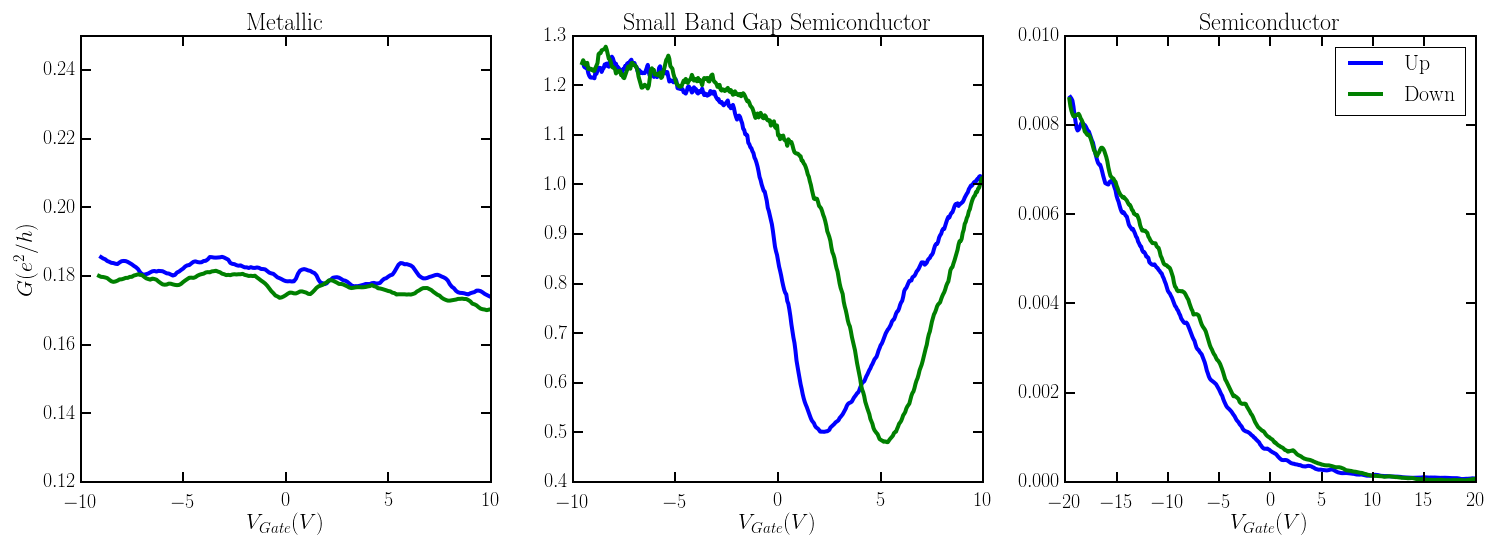

In [4]:
eh = 3.875e-5

fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharex = False, sharey = False, figsize = (25,8))

m = '/Volumes/JUPITER/Data/scfmh5/gateswp_14-12-6_300K-0T_a.bin'
mbias = 5e-3
df = lvdt.get_data_2d(m)
df['up'] = (df['Gate']-df['Gate'].shift()).fillna(0)>0
df['Gavg'] = df['Iavg']/mbias

dfup = df[df['up']==True]
dfup = dfup.groupby(dfup['Gate']).mean()
dfup = pd.rolling_mean(dfup, 10)
dfdown = df[df['up']==False]
dfdown = dfdown.groupby(dfdown['Gate']).mean()
dfdown = pd.rolling_mean(dfdown, 10)

ax1.plot(dfup.index, dfup['Gavg']/eh, label = 'Up')
ax1.plot(dfdown.index, dfdown['Gavg']/eh, label = 'Down')
ax1.set_ylabel(r'$G (e^2/h)$', fontsize = 22)
ax1.set_xlabel(r'$V_{Gate}(V)$', fontsize = 22)
ax1.set_ylim(0.12,0.25)
ax1.set_title('Metallic', fontsize = 24)

sbg = '/Volumes/JUPITER/Data/scfmi4/gateswp_4-20-6_300K_e.bin'
df = lvdt.get_data_2d(sbg)
df['up'] = (df['Gate']-df['Gate'].shift()).fillna(0)>0

dfup = df[df['up']==True]
dfup = dfup.groupby(dfup['Gate']).mean()
dfup = pd.rolling_mean(dfup, 10)
dfdown = df[df['up']==False]
dfdown = dfdown.groupby(dfdown['Gate']).mean()
dfdown = pd.rolling_mean(dfdown, 10)

ax2.plot(dfup.index, dfup['Gavg']/eh, label='Up')
ax2.plot(dfdown.index, dfdown['Gavg']/eh, label='Down')
ax2.set_xlabel(r'$V_{Gate}(V)$', fontsize = 22)
ax2.set_title('Small Band Gap Semiconductor', fontsize = 24)

s = '/Volumes/JUPITER/Data/scfmm6_q4/room_temp/gateswp_19-11_1_c.bin'
df = lvdt.get_data_2d(s)
sbias = 20e-3
ind = split_sweeps(df, 'Gate')
df['up'] = (df['Gate']-df['Gate'].shift()).fillna(0)>0
df['Gavg'] = df['Iavg']/sbias

dfup = df[df['up']==True]
dfup = dfup.groupby(dfup['Gate']).mean()
dfup = pd.rolling_mean(dfup, 5)
dfdown = df[df['up']==False]
dfdown = dfdown.groupby(dfdown['Gate']).mean()
dfdown = pd.rolling_mean(dfdown, 5)

ax3.plot(dfup.index, dfup['Gavg']/eh, label='Up')
ax3.plot(dfdown.index, dfdown['Gavg']/eh, label='Down')
ax3.set_xlabel(r'$V_{Gate}(V)$', fontsize = 22)
ax3.set_ylim(0,0.01)
ax3.set_title('Semiconductor', fontsize = 24)
ax3.legend(fontsize = 22)

fig.savefig('/Users/nik/Dropbox/Repos/thesis/figures/chapter2/fet_measurements.png', dpi=300)

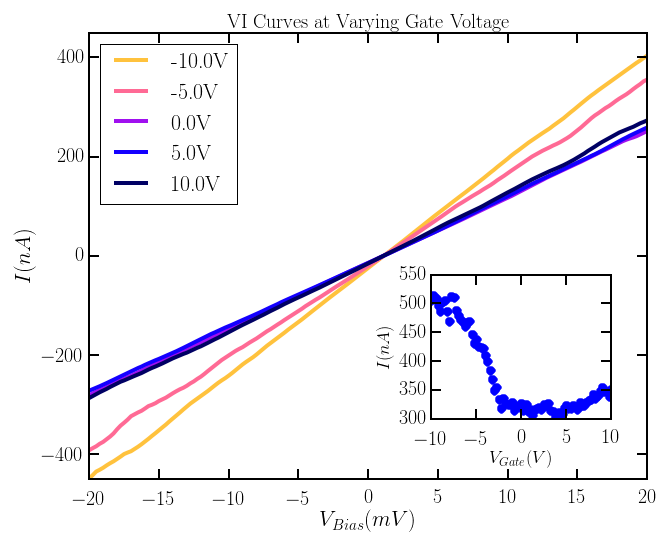

In [23]:
f = '/Volumes/JUPITER/DATA/scfmj7_q1/room_temp/vigate_11-12-6_a.bin'
df = lvdt.get_data_3d(f)
df = df.groupby(df.index).mean()
df.index = df.index*1000
df = pd.rolling_mean(df, 10)

bias = df.index
fig, ax = plt.subplots()
gates = [-10.0, -5.0, 0.0, 5.0, 10.0]
ind = np.insert(np.arange(-27,28), 28, 0)
color_idx = np.linspace(0.8, 0.1, len(gates))
for i, g in enumerate(gates):
    ax.plot(bias,df[g]*1e9, 
            color=plt.cm.gnuplot2(color_idx[i]), label = '{0}V'.format(g))
ax.set_xlabel(r'$V_{Bias} (mV)$', fontsize = 22)
ax.set_xlim(-20,20)
ax.set_ylabel(r'$I (nA)$', fontsize = 22)
ax.set_ylim(-450, 450)
ax.set_title('VI Curves at Varying Gate Voltage')
ax.legend(loc = 'upper left', fontsize = 22)

axin=fig.add_axes([0.6,0.23,0.25,0.25])
axin.plot(df.columns, df.ix[25.0]*1e9, 'b.')
axin.set_xlabel(r'$V_{Gate} (V)$')
axin.set_ylabel(r'$I (nA)$')

fig.savefig('/Users/nik/Dropbox/Repos/thesis/figures/chapter2/transistor_curves.png', dpi=300)

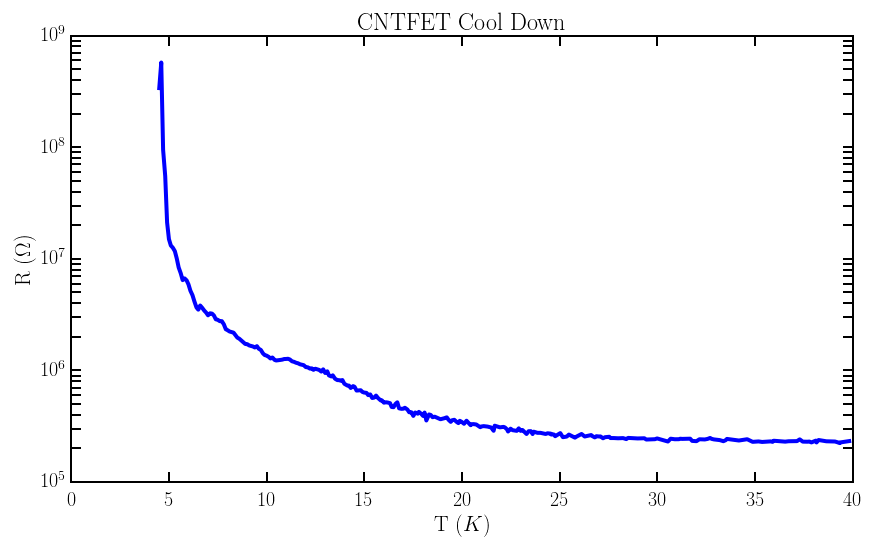

In [29]:
f = '/Volumes/JUPITER/Data/scfmh5/cooldown_14-12-6_0T_a.bin'

df = lvdt.get_data_2d(f)
df = df[df['T'] < 40.0]

df = df.groupby(df['T'].apply(np.round, decimals=1)).mean()

df = df[df['Iavg'] > 0.0]
df.sort('T', inplace=True)

bias = 2.5e-3

fig = plt.figure(figsize=(14,8))

ax = fig.add_subplot(1,1,1)
ax.plot(df['T'], (bias/df['Iavg'])/1, 'b-')
#ax.set_xlim(5,10)
ax.set_yscale('log')
#ax.set_ylim(0.5e6,0.5e8)
ax.set_title('CNTFET Cool Down', fontsize = 24)
ax.set_ylabel('R $(\Omega)$', fontsize = 22)
ax.set_xlabel('T $(K)$', fontsize = 22)
#ax.legend()
fig.savefig('/Users/nik/Dropbox/Repos/thesis/figures/chapter2/cntfet_cooldown.png', dpi=300)

In [150]:
# looking for that really nice gate sweep data with the 4-fold symmetry from my talks...
# this is the file, my old notes say it's fucked up

f = '/Volumes/JUPITER/Data/SCF72/4K/gate-swp_17-29_13_b.bin'
data = np.fromfile(f, '>d')
data = data.reshape((-1, data[0]))
data = data.byteswap().newbyteorder()
for d in data[0:5, :]:
    print d

[  6.00000000e+00   0.00000000e+00  -5.37068502e-10   4.58959414e-11
   1.12538338e+00   3.33300000e-04]
[  6.00000000e+00   5.00000000e-03  -4.53453409e-10   4.85681637e-11
   2.64100838e+00   3.33300000e-04]
[  6.00000000e+00   1.00000000e-02  -2.92189587e-10   6.26647347e-11
   4.14100838e+00   3.33300000e-04]
[  6.00000000e+00   1.50000000e-02   2.20412415e-10   1.35273945e-10
   5.64100838e+00   3.33300000e-04]
[  6.00000000e+00   2.00000000e-02   1.62654983e-09   2.66207920e-10
   7.15663338e+00   3.33300000e-04]


In [151]:
# look for index of the row where the first element is not 6
eps = 1e-6
for i,d in enumerate(data):
    if d[0]-6.0>eps:
        print i
        break

803


In [152]:
data_one = data[0:803,:]
data_two = data[803:,:]

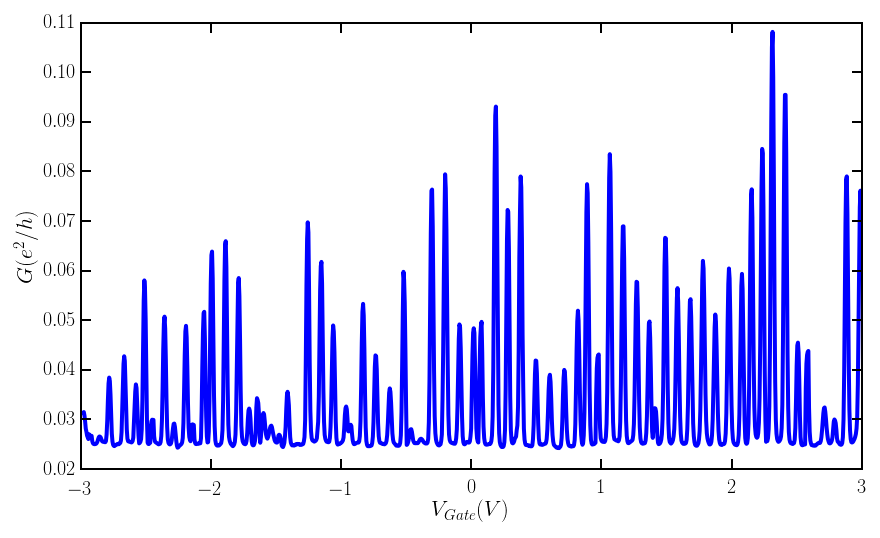

In [168]:
data_two = data_two.reshape((-1, data_two[0,0]))
col_names = ['Size', 'Gate', 'Iavg', 'Istd', 't0', 'dt']
col_names.extend(['i'+str(n) for n in range(int(data_two[0,0]-6))])
df = pd.DataFrame(data_two, columns = col_names)
eh = 3.875e-5
sbias = 1e-3
df['up'] = (df['Gate']-df['Gate'].shift()).fillna(0)>0
df['Iavg']=df['Iavg']+0.5e-9
df['Gavg'] = df['Iavg']/sbias

dfup = df[df['up']==True]
dfup = dfup.groupby(dfup['Gate']).mean()
dfup = pd.rolling_mean(dfup, 5)
dfdown = df[df['up']==False]
dfdown = dfdown.groupby(dfdown['Gate']).mean()
dfdown = pd.rolling_mean(dfdown, 5)

fig, ax = plt.subplots(1,1, figsize = (14,8))
# ax.plot(dfup.index, dfup['Gavg']/eh, label='Up')
ax.plot(dfdown.index, dfdown['Gavg']/eh, label='Down')
#ax1.plot(dfup.index, dfup['Iavg']*1e9, label='Up')
#ax.plot(dfdown.index, dfdown['Iavg']*1e9, label='Down')
ax.set_xlabel(r'$V_{Gate}(V)$', fontsize = 22)
# ax1.set_ylabel(r'$G (e^2/h)$', fontsize = 22)
ax.set_ylabel(r'$G (e^2/h)$', fontsize = 22)
ax.set_xlim(-3,3)
#ax.set_title('', fontsize = 24)
# ax.legend(fontsize = 22)
fig.savefig('/Users/nik/Dropbox/Repos/thesis/figures/chapter2/gate_sweep.png', dpi=300)